In [1]:
import cv2 as cv
import numpy as np

In [2]:
from PIL import Image
import configparser
import os

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

In [ ]:
# # 4버전이랑 3버전이랑 코드가 다름
# OpenCV 4.x
# contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# OpenCV 3.x
# _, contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
# 이미지 불러오기 
img_color = cv.imread('test.png')

# 이미지 흑백전환
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# 임계점 설정(threshold)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)

# Contours 추출
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Contours 박스 그리기
for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

# 이미지 보여주기
cv.imshow("result1", img_color)

# 이미지 아웃
cv.waitKey(0)

# # ?? 이거 뭔지 모르겠다
for cnt in contours:

    area = cv.contourArea(cnt)

    print(area)


cv.imshow("result2", img_color)

cv.waitKey(0)

In [ ]:
# 연습
img_color = cv.imread('square.png')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

cv.imshow("result", img_color)

cv.waitKey(0)


for cnt in contours:

    epsilon = 0.02 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    print( len(approx))

    cv.drawContours(img_color,[approx],0,(0,255,255),5)


cv.imshow("result", img_color)

cv.waitKey(0)

In [46]:
filename = '(190621).jpg'
img = cv.imread(filename)

img_final = cv.imread(filename)
img2gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10,255,cv.THRESH_BINARY)
image_final = cv.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv.threshold(image_final, 10,255,cv.THRESH_BINARY)
'''
    5-8 : 이미지 노이즈 제거
'''
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(1,1))

dilated = cv.dilate(new_img, kernel, iterations=5)
# cv.imshow('dilated', dilated)
# cv.waitKey()

In [47]:
# 경계점 찾아서 반환
contours, hierarchy = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

In [48]:
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [49]:
cv.imshow('captcha_result', img)
cv.waitKey()
# data = pytesseract.image_to_string(img, lang='kor')
# print(data)

-1

In [ ]:
# img_path = '(190621).jpg'
# img = cv.imread(img_path)
# cv.imshow('image',img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [50]:
cv.imwrite('C:\\Labor\\test.jpg', img)

True

In [4]:
import numpy as np

In [51]:
# 다시 정리 시작
# 이미지 입력 -> RGB-GRAY 변환 -> MorphGradienr(경계 이미지 추출)
# -> Adaptrive Trheshold(잡영제거) -> MoprhClose(작은 구멍을 메우고 경계 강화)
# -> Long Line Remove(글씨 추출에 방해되는 요소 제거) -> Contour추출

In [52]:
# 이미지 입력
filename = '(190621).jpg'
image = cv.imread(filename)

In [53]:
# RGB - Gray 변환
img2gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(img2gray, 80,255,cv.THRESH_BINARY)
image_final = cv.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv.threshold(image_final, 80,255,cv.THRESH_BINARY)

In [70]:
# Morph Gradient(경계 이미지 추출)
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(9,9))

dilation = cv.dilate(new_img, kernel, iterations=5)
erosion = cv.erode(new_img,kernel, iterations=5)
result = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

In [62]:
cv.imshow('result', result)
cv.waitKey()

-1

In [63]:
from matplotlib import pyplot as plt

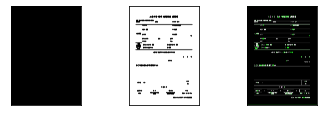

In [71]:
images = [dilation, erosion, result]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [72]:
for i in range(3):
    cv.imwrite('C:\\Labor\\test{}.jpg'.format(i), images[i])

In [ ]:
# Adaptrive Trheshold(잡영제거)

In [ ]:
# MoprhClose(작은 구멍을 메우고 경계 강화)

In [ ]:
# Long Line Remove(글씨 추출에 방해되는 요소 제거)

In [78]:
# Contour추출
contours, hierarchy = cv.findContours(erosion, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

In [79]:
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [80]:
cv.imshow('captcha_result', image)
cv.waitKey()

-1

In [81]:
cv.imwrite('C:\\Labor\\test.jpg', image)

True